<a href="https://colab.research.google.com/github/fininsight/text-mining-tutorial/blob/master/1_%EB%8B%A8%EC%96%B4%EC%9D%98_%ED%91%9C%ED%98%84_Word_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단어의 표현 (Word Representation)


*   기계는 문자를 그대로 인식할 수 없기때문에 숫자로 변환



# 1 원-핫 인코딩 (One-Hot Encoding)
* 단어 집합 갯수 만큼 

## 1.1 "원숭이, 바나나, 사과" 로 원-핫 인코딩을 한다면

In [0]:
# 인코딩 대상 단어들을 담은 리스트
word_ls = ['원숭이','바나나','사과']

In [0]:
from collections import defaultdict
import numpy as np 

def one_hot_encode(word_ls):
    # 고유 단어와 인덱스를 매칭시켜주는 사전 생성
    word2idx_dic = defaultdict(lambda:len(word2idx_dic)) 
    
    # {단어 : 인덱스} 사전 구축
    for word in word_ls:
        word2idx_dic[word]
    
    n_unique_words = len(word2idx_dic) # 고유한 단어의 갯수
    one_hot_vectors = np.zeros((len(word_ls), n_unique_words)) # 원핫-벡터를 만들기 위해 비어있는 벡터 생성
    
    for i,word in enumerate(word_ls):
        index = word2idx_dic[word] # 해당 단어의 고유 인덱스
        one_hot_vectors[i, index] += 1 # 해당 단어의 고유 인덱스에만 1을 더해줌
        
    return one_hot_vectors

In [29]:
one_hot_vectors = one_hot_encode(word_ls)
one_hot_vectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 1.2 "코끼리"라는 단어가 추가된다면?

In [0]:
word_ls = ['원숭이','바나나','사과','코끼리']

In [31]:
one_hot_vectors = one_hot_encode(word_ls)
one_hot_vectors

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## 1.3 sklearn을 활용한 one-hot encoding


함수명 | 설명
--|--
fit(X[, y])	| Fit OneHotEncoder to X.
fit_transform(X[, y])	| Fit OneHotEncoder to X, then transform X.
inverse_transform(X)	| Convert the back data to the original representation.
transform(X)	| Transform X using one-hot encoding.

In [32]:
# sklearn을 활용한 one-hot encoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 예제 데이터 배열
values = array(word_ls)
print(values)

# 문자열에 숫자를 붙임
label_enc = LabelEncoder()
int_enc = label_enc.fit_transform(values)
print(int_enc)

# binary encode
onehot_enc = OneHotEncoder(sparse=False)
int_enc = int_enc.reshape(len(int_enc), 1) # n:1 matrix로 변환
onehot_enc = onehot_enc.fit_transform(int_enc)
print(onehot_enc)

# one-hot encoding 의 첫번째 배열을 값을 역으로 산출
inverted = label_enc.inverse_transform([argmax(onehot_enc[0, :])])
print(inverted)

['원숭이' '바나나' '사과' '코끼리']
[2 0 1 3]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
['원숭이']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)




---



# 2 밀집 벡터 (Dense Vector)

In [0]:
word_embedding_dic = {
    '사과' : [1.0, 0.5],
    '바나나' : [0.9, 1.2],
    '원숭이' : [0.5, 1.5]
}



---



# 3 유사도 계산

## 3.1 유클리디언 거리(Euclidean distance)
두 벡터사이의 직선 거리. 피타고라스 정리를 생각하면 이해하기 쉬움

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/220px-Euclidean_distance_2d.svg.png"  width="200"/>

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/795b967db2917cdde7c2da2d1ee327eb673276c0" width="350"/>

https://en.wikipedia.org/wiki/Euclidean_distance

In [50]:
import numpy as np
def euclidean_dist(x,y):   
    x = np.array(x)
    y = np.array(y)
    return np.sqrt(np.sum(x-y)**2)
  
# 사과와 바나나의 코사인 유사도
euclidean_dist(word_embedding_dic['사과'], word_embedding_dic['바나나'])

0.6

## 3.2 자카드 유사도(Jaccard index)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Intersection_of_sets_A_and_B.svg/200px-Intersection_of_sets_A_and_B.svg.png" />

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7" />

https://en.wikipedia.org/wiki/Jaccard_index

In [64]:
s1 = '대부분 원숭이는 바나나를 좋아합니다.'
s2 = '코주부 원숭이는 바나나를 싫어합니다.'

# 토큰화를 수행합니다.
token_s1 = s1.split()
token_s2 = s2.split()

union = set(token_s1).union(set(token_s2))
print(union)

intersection = set(token_s1).intersection(set(token_s2))
print(intersection)

print(len(intersection)/len(union)) # 2를 6로 나눔.

{'코주부', '대부분', '좋아합니다.', '싫어합니다.', '바나나를', '원숭이는'}
{'바나나를', '원숭이는'}
0.3333333333333333


## 3.3 코사인 유사도(Cosine Similarity) 계산

*  두 벡터간의 유사도를 측정하는 방법 중 하나
*  두 벡터 사이의 코사인을 측정
*  0도 = 1, 90도 = 0, 180도 = -1   ==> 1에 가까울수록 유사도가 높음




<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png" width="300"/>

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d" width='350'/>

https://en.wikipedia.org/wiki/Cosine_similarity

In [0]:
def cosine_similarity(x, y):
    # x와 y, 두 벡터의 코사인 유사도를 계산하는 함수
    nominator = np.dot(x, y)    # 분자
    denominator = np.linalg.norm(x)*np.linalg.norm(y)  # 분모
    return nominator/denominator

In [54]:
# 사과와 바나나의 코사인 유사도
print(cosine_similarity(word_embedding_dic['사과'], word_embedding_dic['바나나']))
print(euclidean_dist(word_embedding_dic['사과'], word_embedding_dic['바나나']))

0.8944271909999159
0.6


In [57]:

# 사과와 원숭이의 코사인 유사도
print(cosine_similarity(word_embedding_dic['사과'], word_embedding_dic['원숭이']))
print(euclidean_dist(word_embedding_dic['사과'], word_embedding_dic['원숭이']))

0.7071067811865475
0.5


In [58]:
# 바나나와 원숭이의 코사인 유사도
print(cosine_similarity(word_embedding_dic['바나나'], word_embedding_dic['원숭이']))
print(euclidean_dist(word_embedding_dic['바나나'], word_embedding_dic['원숭이']))

0.9486832980505138
0.09999999999999998




---



# 4 단어 임베딩 (Word Embedding)

## 4.1 구글드라이브 내 파일 읽어오기

In [68]:
# 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증을 합니다.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.7MB/s 


In [69]:
url_it ='https://drive.google.com/open?id=1Yj9sJ-E_ZiOmEcHpsHI7-iIvs08HEVNN'
id_it = url_it.split('=')[1]
print(id_it)

url_culture ='https://drive.google.com/open?id=1eG0Tdh3b27Su5Zt45LXdBS3sHe2kDb7x'
id_culture = url_culture.split('=')[1]
print(id_culture)

1Yj9sJ-E_ZiOmEcHpsHI7-iIvs08HEVNN
1eG0Tdh3b27Su5Zt45LXdBS3sHe2kDb7x


In [70]:
%ls

adc.json  sample_data/


In [0]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
downloaded = drive.CreateFile({'id':id_it}) 
downloaded.GetContentFile('2_word_embedding_it.csv')  

# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
downloaded = drive.CreateFile({'id':id_culture}) 
downloaded.GetContentFile('2_word_embedding_culture.csv')  

In [72]:
%ls

2_word_embedding_culture.csv  2_word_embedding_it.csv  adc.json  sample_data/


In [0]:
import pandas as pd
it_df = pd.read_csv('2_word_embedding_it.csv').dropna()
culture_df = pd.read_csv('2_word_embedding_culture.csv').dropna()

## 4.2 Word2Vec

<img src="https://www.tensorflow.org/images/linear-relationships.png" />

https://en.wikipedia.org/wiki/Word2vec

In [0]:
it_token_ls = list(it_df.loc[:,'1'])
culture_token_ls = list(culture_df.loc[:,'1'])
total_token_ls = it_token_ls + culture_token_ls

In [3]:
total_token_ls[0]

'배,정회,신임,과학기술,일자리,진흥,원장,아시아,경제,이민,우,배,정회,전,국립,중앙,과학,관,전시,연구,단장,과학기술,일자리,진흥,제,원장,취임,과학기술,정보,통신,같은,인사,발표,임기,날,동안,배,신임,원장,행정,고등고시,공직,입문,교육,과학기술,부,융합,기술,과장,중앙대,경영,경제,초빙교수,과기,정통부,연구,성과,활용,정책,과장,연구,성과,혁신,기획,과장,과학기술,정책,수립,정부,연구개발,연구,기술,이전,사업,두루,경험,보유,평가,배,신임,원장,날,환담,회,새로운,임무,조직,신속히,성하고,직원,역량,강화하겠다,며,실험실,유망,기술,전,문,기업,연결하며,기술,이전,효과,지원,신,기술,창업,통한,미래,일자리,많이,창,고,이민,우,네이버,홈,아시아,경제,뉴스,확인,재미,신기,과학,꿀,잼,인,기,만화,경제,눈,세계,창,아시아,경제,전,재'

In [0]:
total_token_ls = [tokens.split(',') for tokens in total_token_ls]

In [5]:
total_token_ls[0][:10]

['배', '정회', '신임', '과학기술', '일자리', '진흥', '원장', '아시아', '경제', '이민']

In [6]:
!pip install paramiko
from gensim.models import Word2Vec

In [0]:
word2vec = Word2Vec(
    sentences = total_token_ls,  # 학습시킬 문장
    size = 30,                  # 임베딩된 단어 벡터의 차원 크기
    alpha = 0.025,               # 학습률(Learning rate)
    min_count=2,                 # 1번 미만 등장한 단어는 제외
    window = 8,                  # 문맥의 크기 (window_size)
    sample = 0.001,              # sub-sampling
    sg = 1,                      # 0: CBOW, 1: Skip-gram
    iter = 10,                    # 전체 문장 반복학습 횟수(epoch)
    )

In [8]:
word2vec.wv.__getitem__('문화')

array([-0.38023725,  0.08235244,  0.6087531 , -0.7054662 , -0.5288843 ,
        0.57676905,  0.42988518, -0.5838525 , -1.1006514 ,  0.14880407,
       -0.41242316,  0.12570927,  0.93079644, -0.9023541 , -0.09681659,
        0.87425816,  0.12221109, -0.63660115, -0.5278069 ,  0.8849759 ,
       -0.11252485, -0.8479934 , -0.47526526, -0.04466126, -0.10835234,
        0.5308488 , -0.19399619,  0.21700986,  1.1068195 ,  0.17998295],
      dtype=float32)

In [9]:
word2vec.wv.most_similar('인공')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('지능', 0.9601393938064575),
 ('학습', 0.8375533819198608),
 ('유전자', 0.8331709504127502),
 ('결합', 0.8100515007972717),
 ('정확성', 0.8024963736534119),
 ('의료', 0.7967638373374939),
 ('핀란드', 0.7851952910423279),
 ('스피커', 0.7851660847663879),
 ('커뮤니티', 0.7837557792663574),
 ('프로젝트', 0.7785829901695251)]

In [10]:
word2vec.wv.most_similar('공연')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('회관', 0.9273419976234436),
 ('평양', 0.9197524189949036),
 ('국악', 0.9182810187339783),
 ('관현악단', 0.9150010347366333),
 ('예술', 0.9145097732543945),
 ('극장', 0.8925732374191284),
 ('기원', 0.8835269212722778),
 ('클래식', 0.881685197353363),
 ('연주', 0.8762198686599731),
 ('그림', 0.8752867579460144)]

In [0]:
culture_df

,Unnamed: 0,0,1
0,0,"""[안성완 인턴기자 asw0727@imaeil.com] 사진=위메프 홈페이지 캡쳐위...","안성,완,인턴,사진,위,메,프,홈페이지,캡쳐,위메프,반값,특,밤,네티즌,관심,위,메..."
1,1,"""울산과 경남, 경북, 강원, 제주 등 5개 시도에서 공공 부문 중심 미세먼지 비상...","울산,경남,경북,강원,제주,개,시도,공공,부문,중심,미세,먼지,비상,감,조치,환경부..."
2,2,"""한국방송통신대학교(총장 류수노/이하 방송대)가 1월19일 ‘제 1회 KNOU 글로...","한국,방송통신,대학교,총장,류,노,이하,방송,제,글로벌,봉사,단,고엽제,피해자,수용..."
3,3,"""배우 박환희. [사진 박환희 인스타그램] 배우 박환희(29)가 섬유근육통...","배우,박,환희,사진,박,환희,인스타,그램,배우,박,환희,섬유,근육통,있다고,박,환희..."
4,4,"""ㆍ두 얼굴의 문명, 그 너머를 위해이탈리아 로마 근교 아피아 가도에는 아직도 수레...","두,얼굴,문명,너머,위해,이탈리아,로마,근교,아피아,가도,아직도,수레바퀴,자국,선명..."
5,5,"""(서울=연합뉴스) 서울 종로구 부암동 서울미술관이 22일 기자간담회를 열고 신관을...","서울,연합,서울,종로구,부암동,서울,미술관,간담,회,신관,공개,신관,지하,층,지상,..."
6,6,"""(서울=연합뉴스) 국립중앙박물관은 22일 손혜원 의원 관련 의혹을 해명하면서 작년...","서울,연합,국립,중앙,박물관,손,혜,원,의원,관련,의혹,해명,작년,구매,현대,금속,..."
7,7,"""동영상 뉴스","동,영상"
8,8,\t지난 20일 <SBS스페셜>을 통해 소개된 단식모방식단 FMD(Fasting-M...,"지난,스페셜,통해,소개,단식,모방,식단,대한,대중,관심,뜨겁습니다,달,제한,식단,섭..."
9,9,"""자료로 짚어본 한글과 여성“국문(한글)이 생긴 후 제일가는 명필”이란 극찬을 받은...","자료,한글,여성,국문,한글,후,제,일가,명필,이란,극찬,서기,씨,여성,조선말,최고,..."


## 4.3 차원축소 활용 시각화

In [28]:
similar_words = {search_term: [item[0] for item in word2vec.wv.most_similar([search_term], topn=20)]
                  for search_term in ['문화','인공','공연']}
similar_words

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'공연': ['회관',
  '평양',
  '국악',
  '관현악단',
  '예술',
  '극장',
  '기원',
  '클래식',
  '연주',
  '그림',
  '사물놀이',
  '초청',
  '남',
  '부산',
  '단',
  '베토벤',
  '개최',
  '영화인',
  '안무',
  '올림픽'],
 '문화': ['체육',
  '예술',
  '평화',
  '우영',
  '회관',
  '교류',
  '대학교',
  '남북',
  '올림픽',
  '금강산',
  '북한',
  '확산',
  '무용',
  '특위',
  '문화유산',
  '꼽았다',
  '정규',
  '공연',
  '홍보',
  '남북정상회담'],
 '인공': ['지능',
  '학습',
  '유전자',
  '결합',
  '정확성',
  '의료',
  '핀란드',
  '스피커',
  '커뮤니티',
  '프로젝트',
  '접목',
  '높아',
  '러닝',
  '물론',
  '체인',
  '기반',
  '가상',
  '블록',
  '지니',
  '강우']}

In [29]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [0]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

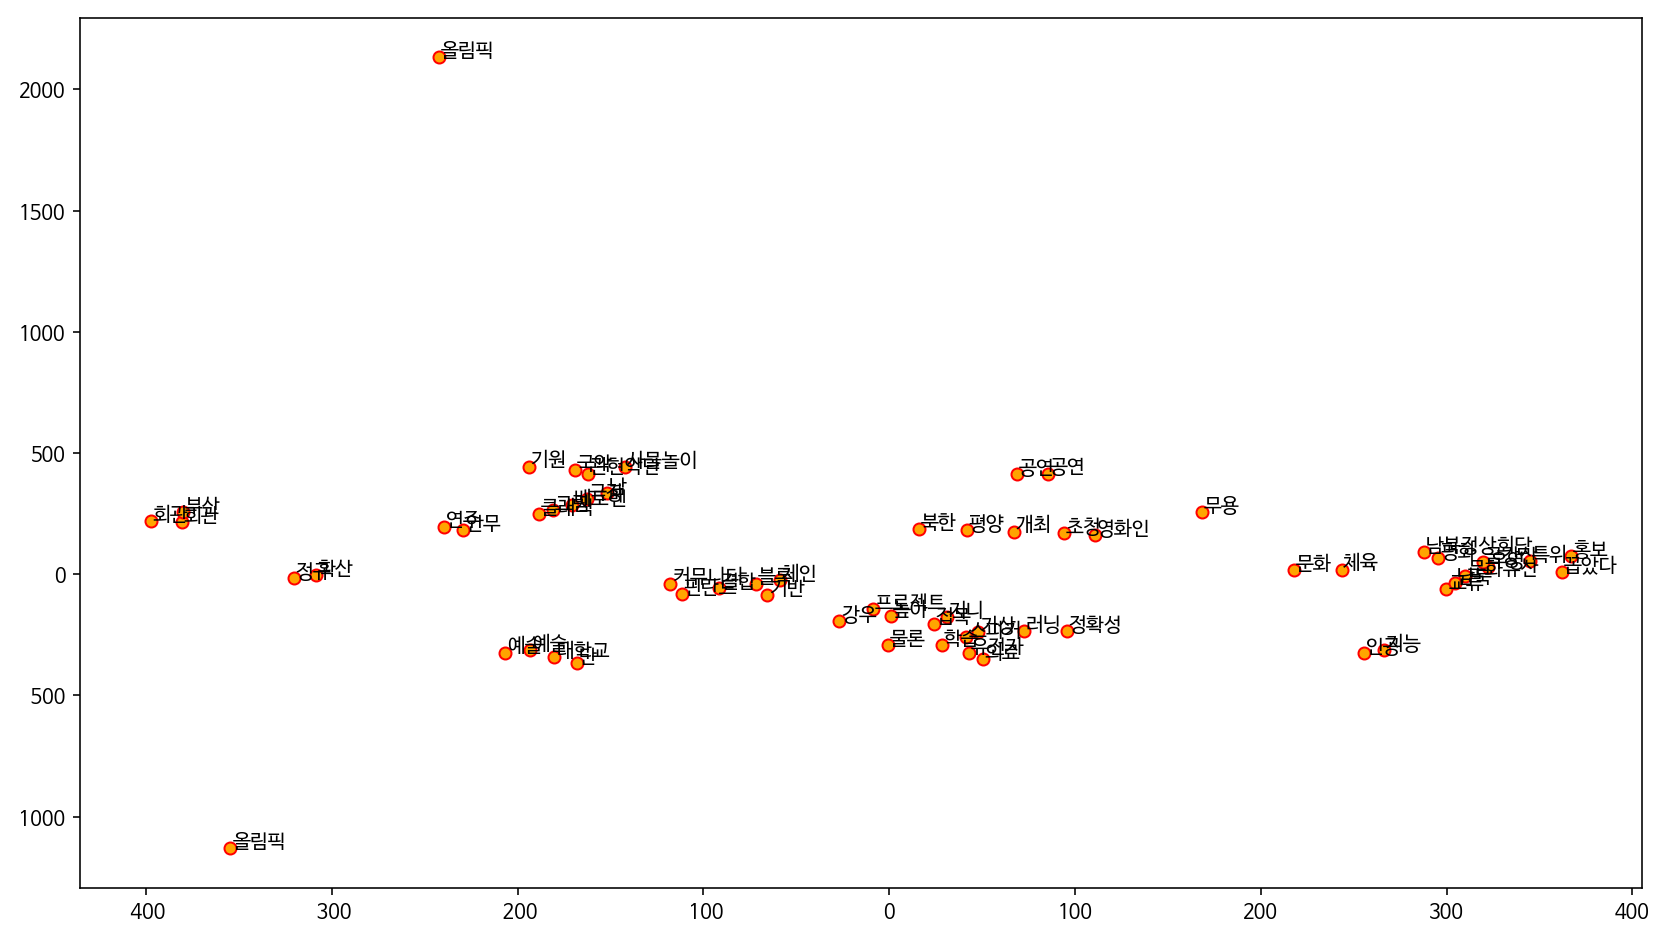

In [31]:
from sklearn.manifold import TSNE
import numpy as np

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')